In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import random
import os

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

In [3]:
os.getcwd()

'/Users/christianlehre/Desktop/V21/Masteroppgave/code/notebooks'

In [4]:
path_to_raw_data =  "../thesis/data/raw_regression.csv"
raw_data = pd.read_csv(path_to_raw_data, sep=",")
print(len(list(set(raw_data["well_name"]))))
print(list(set(raw_data["well_name"])))

36
['30/11-7', '30/11-7 A', '25/2-18 ST2', '25/5-5', '25/5-9', '30/11-9 ST2', '25/7-4 S', '25/5-6', '25/10-16 S', '25/8-14 ST2', '30/9-22', '25/11-24', '30/11-11 S', '30/11-9 A', '30/5-2', '25/2-18 A', '25/8-12 A', '25/10-16 C', '25/8-12 S', '25/4-7', '25/8-8 S', '25/4-10 S', '25/8-11', '30/11-8 S', '25/10-10', '25/4-9 S', '25/6-4 S', '30/11-6 S', '25/4-13 A', '25/10-15 S', '25/10-12 ST2', '30/8-5 T2', '25/7-6', '30/11-10', '25/10-16 A', '30/6-26']


In [139]:
raw_data.shape

(689727, 45)

In [6]:
print(list(raw_data.columns))
print(len(list(raw_data.columns)))

['Unnamed: 0', 'DEPTH', 'AC', 'ACS', 'AI', 'BADAC', 'BADACS', 'BADDATA_FLAG', 'BADDEN', 'BADDEPTH', 'BS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'RMIC', 'ROP', 'RSHA', 'TH', 'U', 'VP', 'DWCAR', 'DWCLA', 'DWCLC', 'DWCOA', 'DWDOL', 'DWPYR', 'DWQFM', 'DWSID', 'RXO', 'DWANH', 'DWEVA', 'SGR', 'SFLU', 'SP', 'U-1001', 'CGR', 'FPRESS', 'MW', 'well_name', 'lsuName']
45


In [6]:
raw_data.sample(5)

,Unnamed: 0,DEPTH,AC,ACS,AI,BADAC,BADACS,BADDATA_FLAG,BADDEN,BADDEPTH,...,DWEVA,SGR,SFLU,SP,U-1001,CGR,FPRESS,MW,well_name,lsuName
176503,115309,1425.8544,138.21880,338.6650,4.745944,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25/10-16 S,UNKNOWN
283134,528026,3517.8492,67.24681,122.5373,11.974620,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30/11-11 S,BRENT GP
280908,525800,3178.6068,96.87659,190.7202,7.881827,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30/11-11 S,VIKING GP
202046,743785,2714.5488,98.95115,198.9005,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30/9-22,SHETLAND GP
395664,93975,2409.9012,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25/10-16 C,UNKNOWN


In [9]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Lucidia"]})

In [28]:
sns.set(font_scale=3)

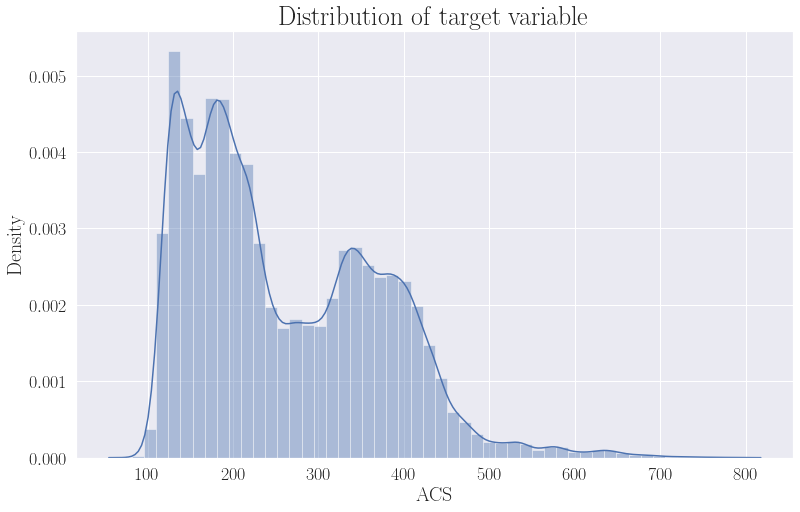

In [30]:
plt.rc("xtick", labelsize=18)
plt.rc("ytick", labelsize=18)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.distplot(raw_data["ACS"], ax=ax)
ax.set_title(r"$\mathrm{Distribution \; of \; target \;variable}$", fontsize=26)
ax.set_ylabel(r"$\mathrm{Density}$", fontsize=20)
ax.set_xlabel(r"$\mathrm{ACS}$", fontsize=20)
plt.tight_layout()
#plt.savefig("ACS_distribution_raw.pdf")


In [13]:
wells = list(set(raw_data["well_name"]))
print(wells)
print("number of wells: {}".format(len(wells)))

['30/11-7', '30/11-7 A', '25/2-18 ST2', '25/5-5', '25/5-9', '30/11-9 ST2', '25/7-4 S', '25/5-6', '25/10-16 S', '25/8-14 ST2', '30/9-22', '25/11-24', '30/11-11 S', '30/11-9 A', '30/5-2', '25/2-18 A', '25/8-12 A', '25/10-16 C', '25/8-12 S', '25/4-7', '25/8-8 S', '25/4-10 S', '25/8-11', '30/11-8 S', '25/10-10', '25/4-9 S', '25/6-4 S', '30/11-6 S', '25/4-13 A', '25/10-15 S', '25/10-12 ST2', '30/8-5 T2', '25/7-6', '30/11-10', '25/10-16 A', '30/6-26']
number of wells: 36


In [14]:
target_variable = "ACS"

['25/8-14 ST2', '25/4-10 S', '25/4-13 A', '30/8-5 T2']


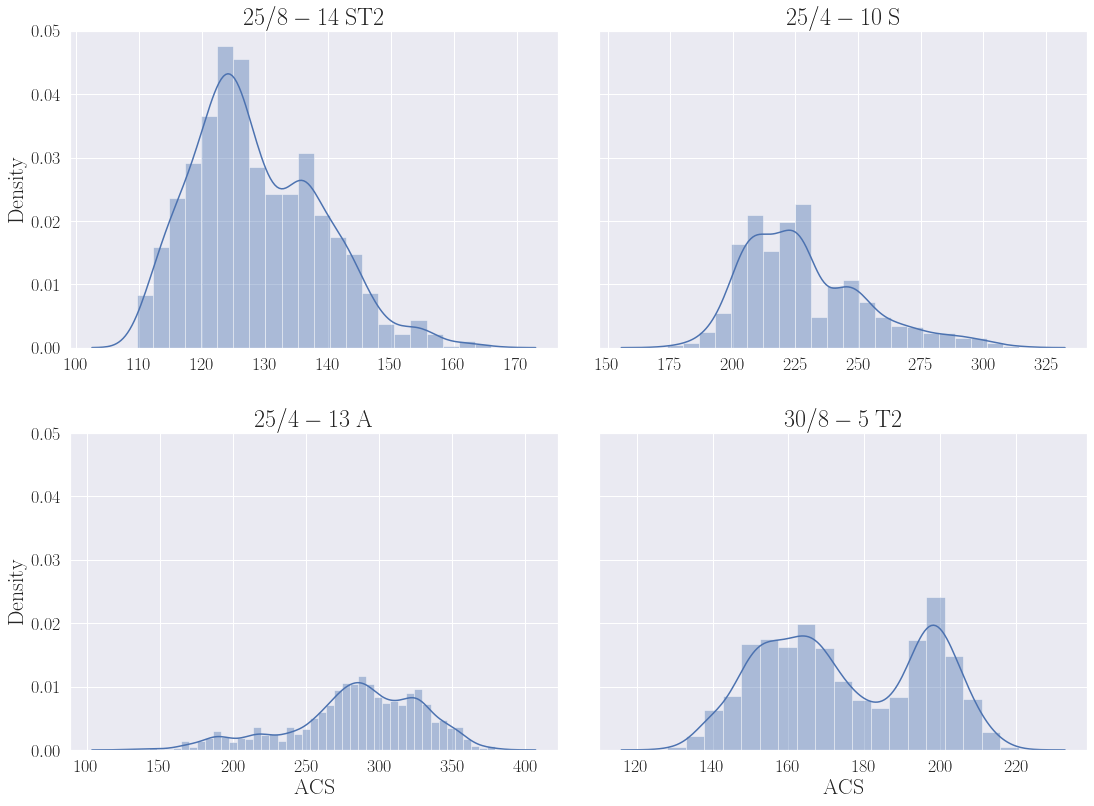

In [19]:
# sample 4 wells and plot in a grid
sampled_wells = ['25/8-14 ST2', '25/4-10 S', '25/4-13 A', '30/8-5 T2'] #random.sample(wells,4)
print(sampled_wells)

fig, axs = plt.subplots(len(sampled_wells)//2, 2, figsize=(16, 12), sharey=True)
sns.distplot(raw_data[raw_data["well_name"] == sampled_wells[0]]["ACS"], ax=axs[0, 0])
axs[0, 0].set_title(r"$\mathrm{25/8-14 \; ST2}$", fontsize=24)
axs[0, 0].set_ylabel(r"$\mathrm{Density}$", fontsize=22)
axs[0, 0].set_xlabel("")

sns.distplot(raw_data[raw_data["well_name"] == sampled_wells[1]]["ACS"], ax=axs[0, 1])
axs[0, 1].set_title(r"$\mathrm{25/4-10 \; S}$", fontsize=24)
axs[0, 1].set_ylabel("")
axs[0, 1].set_xlabel("")

sns.distplot(raw_data[raw_data["well_name"] == sampled_wells[2]]["ACS"], ax=axs[1, 0])
axs[1, 0].set_title(r"$\mathrm{25/4-13 \; A}$", fontsize=24)
axs[1, 0].set_ylabel(r"$\mathrm{Density}$", fontsize=22)
axs[1, 0].set_xlabel(r"$\mathrm{ACS}$", fontsize=22)
sns.distplot(raw_data[raw_data["well_name"] == sampled_wells[3]]["ACS"], ax=axs[1, 1])
axs[1, 1].set_title(r"$\mathrm{30/8-5 \; T2}$", fontsize=24)
axs[1, 1].set_ylabel("")
axs[1, 1].set_xlabel(r"$\mathrm{ACS}$", fontsize=22)

#plt.suptitle("Distribution of target variable for a random set of wells", fontsize=24)
plt.tight_layout(pad=1)
plt.savefig("ACS_distribution_raw_subset.pdf")

In [31]:
explanatory_variables = ["AC", "AI", "BS", "CALI", "DEN", "GR", "NEU", "RMED", "DEPTH"]


/anaconda/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


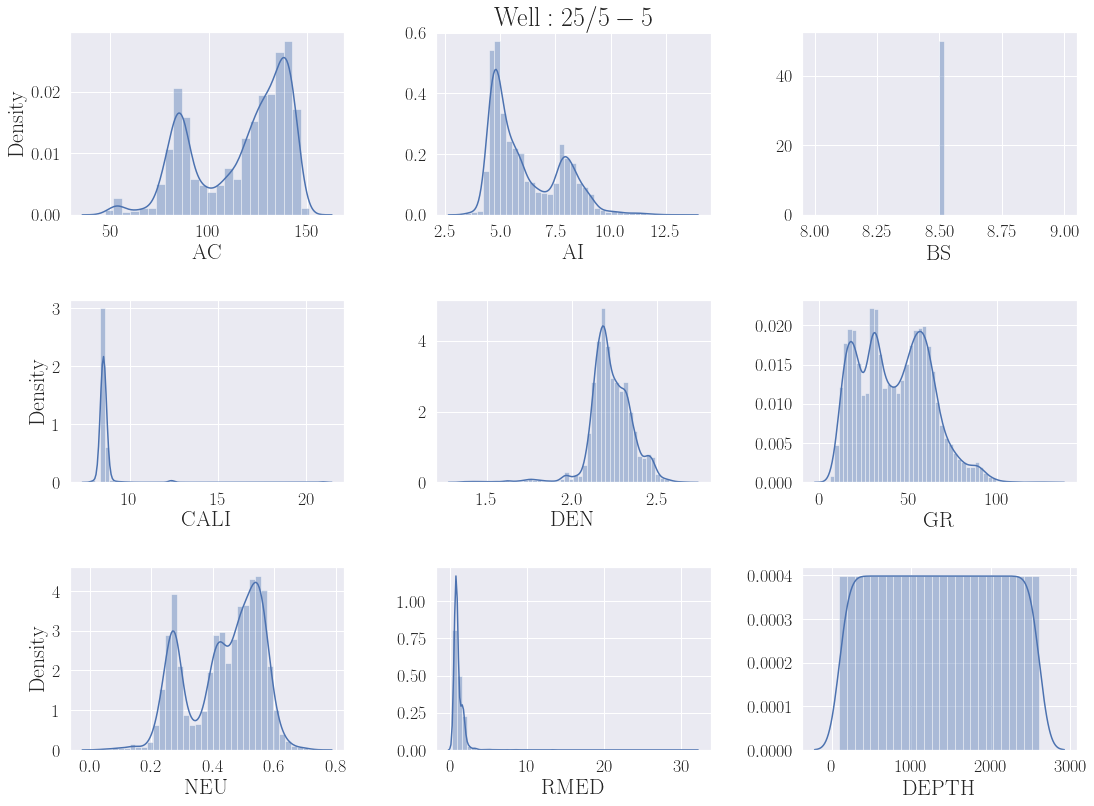

In [63]:
plt.figure(figsize=(16, 12))
raw_data_single_well = raw_data[raw_data["well_name"] == wells[3]]
for i, var in enumerate(explanatory_variables):
    data = raw_data_single_well[var]
    plt.subplot(3, 3, i+1)
    sns.distplot(data)
    plt.xlabel(r"$\mathrm {{{{{}}}}}$".format(var), fontsize=22)
    if i == 1:
        plt.title(r"$\mathrm {{{{Well:}}}} \; {{{{{}}}}}$".format(wells[3]), fontsize=26)
    if i == 0 or i == 3 or i == 6:
        plt.ylabel(r"$\mathrm{Density}$", fontsize=22)
    else:
        plt.ylabel("")
plt.tight_layout(pad=1)
plt.savefig("distribution_predictors_regression_single_well.pdf")

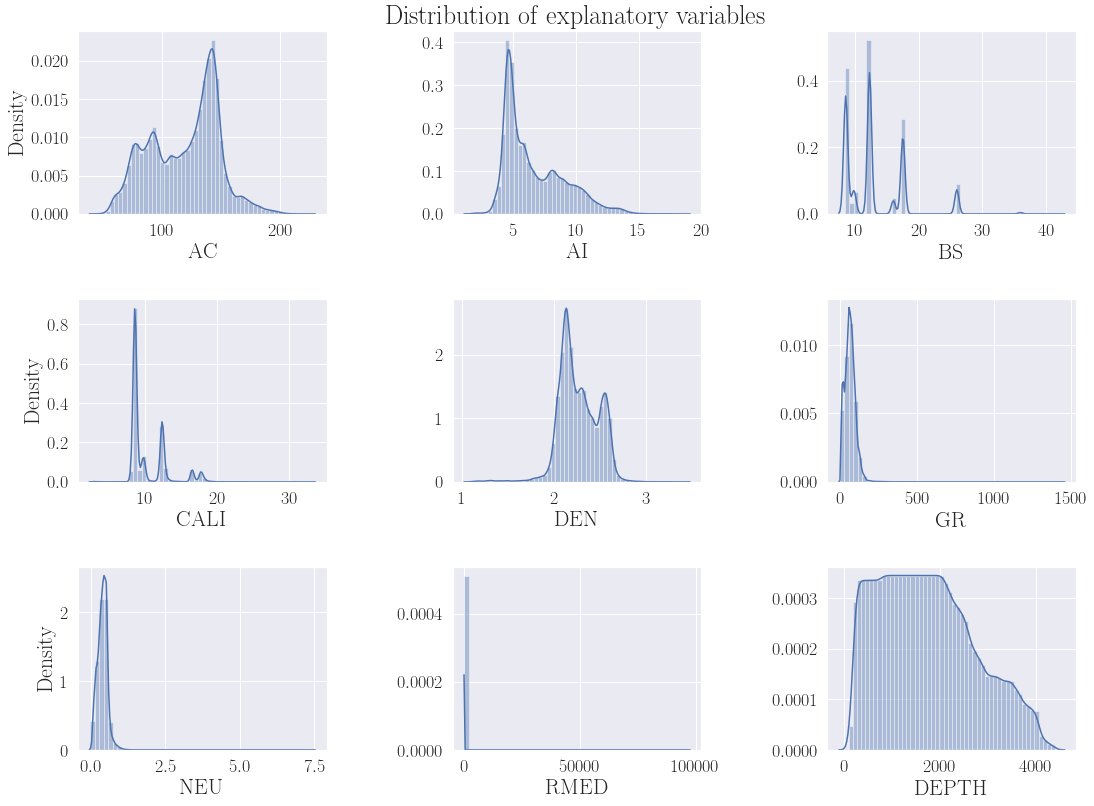

In [64]:
plt.figure(figsize=(16, 12))
raw_data_single_well = raw_data[raw_data["well_name"] == wells[2]]
for i, var in enumerate(explanatory_variables):
    data = raw_data[var]
    plt.subplot(3, 3, i+1)
    sns.distplot(data)
    plt.xlabel(r"$\mathrm {{{{{}}}}}$".format(var), fontsize=22)
    if i == 1:
        plt.title(r"$\mathrm{Distribution \; of \; explanatory \; variables}$", fontsize=26)
    if i == 0 or i == 3 or i == 6:
        plt.ylabel(r"$\mathrm{Density}$", fontsize=22)
    else:
        plt.ylabel("")
plt.tight_layout(pad=1)
plt.savefig("distribution_predictors_regression.pdf")

variables = [target_variable] + explanatory_variables
raw_data = raw_data[variables]

In [91]:
raw_data.describe()

,ACS,AC,AI,BS,CALI,DEN,GR,NEU,RMED,DEPTH
count,276576.000000,364482.000000,285988.000000,640364.000000,292716.000000,340150.000000,667148.000000,342265.000000,651212.000000,677994.000000
mean,261.198929,119.138789,6.633653,13.017365,10.273347,2.267975,64.038612,0.388743,6.969229,1744.042332
std,111.199109,29.137238,2.395435,4.794232,2.700331,0.213032,34.882737,0.166663,216.079936,989.571476
min,81.879330,45.091000,1.639542,8.400000,2.831203,1.070369,-2.126020,-0.018700,0.027645,99.509930
25%,169.758625,93.607193,4.705132,8.500000,8.523412,2.120000,39.938320,0.277400,0.770800,927.811200
50%,228.912700,125.410550,5.808227,12.250000,8.672307,2.235121,62.298350,0.396975,1.142628,1653.997200
75%,348.460525,141.760625,8.269623,17.500000,12.266510,2.430000,84.352067,0.496837,1.729564,2420.900000
max,790.643600,223.019000,18.524900,42.000000,33.005650,3.433700,1452.284000,7.494015,97543.420000,4405.122000


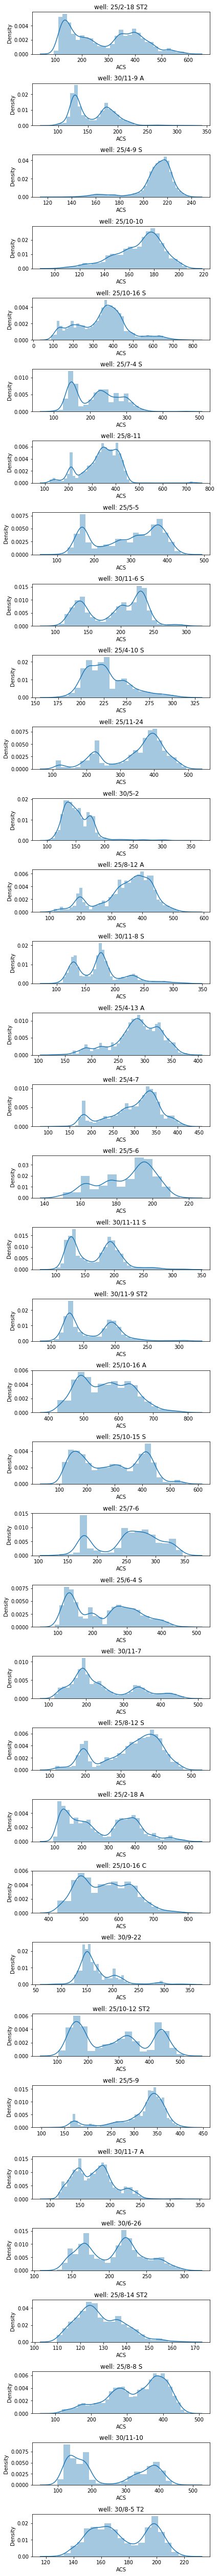

In [31]:
fig, axs = plt.subplots(len(wells), 1, figsize=(6, 70))
for i, well in enumerate(wells):
    data_well = raw_data[raw_data["well_name"] == well]
    axs[i].set_title("well: {}".format(well))
    axs[i].set_title("well: {}".format(well))
    sns.distplot(data_well[target_variable], ax=axs[i])
plt.tight_layout(pad=1)

In [208]:
sampled_raw_data = raw_data.sample(10000)

In [204]:
from scipy.stats import pearsonr
def corrfunc(x, y, ax=None, **kws):
    "Plot Pearson correlation coefficient in top legt corner of a plot"
    x = x.values
    y = y.values
    nas = np.logical_or(np.isnan(x), np.isnan(y))
    corr, _ = pearsonr(x[~nas], y[~nas])
    ax = ax or plt.gca()
    ax.annotate(r'$\rho$' + " = {:.2f}".format(corr), xy=(.1, .9), xycoords=ax.transAxes)

In [212]:
variables = ["ACS"] + explanatory_variables
variables

['ACS', 'AC', 'AI', 'BS', 'CALI', 'DEN', 'GR', 'NEU', 'RMED', 'DEPTH']

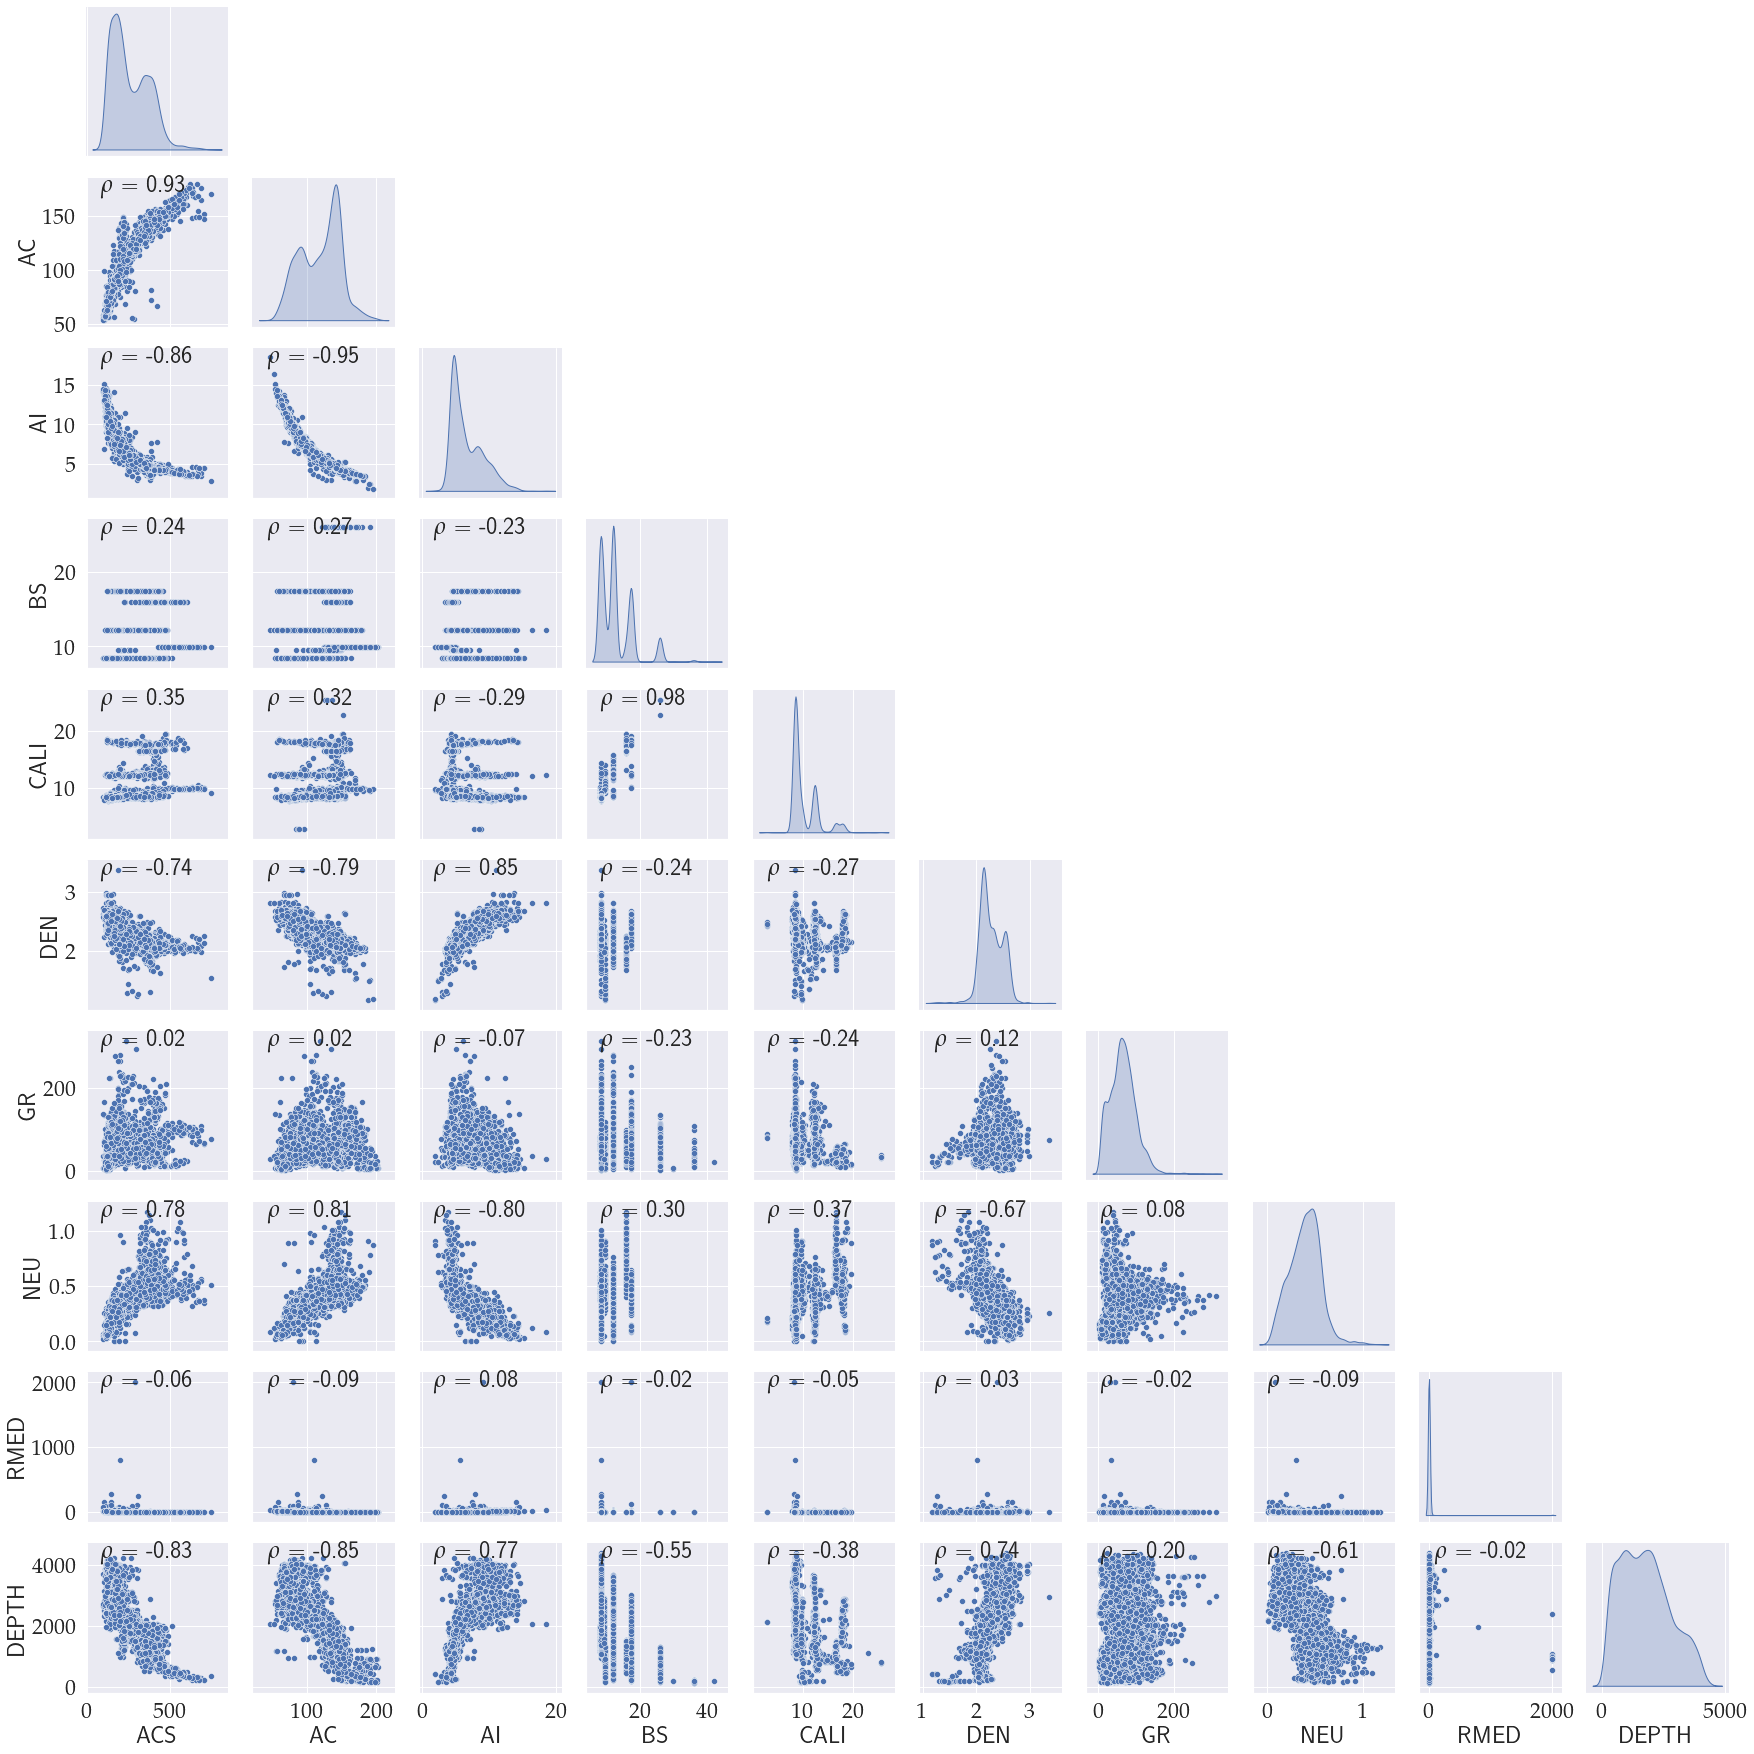

In [213]:
g = sns.pairplot(sampled_raw_data,vars=variables,corner=True, diag_kind="kde", plot_kws=dict())
g.map_lower(corrfunc)
g.savefig("pairplot_explanatory_variables.pdf")

## Fit a linear model and make diagnostic plots

In [49]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from sklearn import linear_model

In [2]:
path_to_preprocessed_data = "../thesis/data/preprocessed_regression.csv"
data = pd.read_csv(path_to_preprocessed_data, sep=";")

In [7]:
len(list(data.columns))


43

In [51]:
wells = list(set(data["well_name"]))
print(wells)
print("number of wells: {}".format(len(wells)))

['30/11-6 S', '25/10-16 A', '25/7-4 S', '30/6-26', '30/11-7 A', '25/7-6', '25/10-16 S', '25/4-10 S', '25/8-14 ST2', '25/8-8 S', '25/8-12 S', '25/4-7', '30/11-7', '25/2-18 ST2', '25/4-9 S', '30/8-5 T2', '30/11-10', '25/10-15 S', '30/9-22', '25/8-12 A', '30/11-8 S', '30/11-11 S', '25/10-12 ST2', '25/5-5', '25/10-16 C', '25/6-4 S', '25/4-13 A', '30/5-2', '30/11-9 ST2', '25/5-6', '25/11-24', '30/11-9 A', '25/2-18 A', '25/5-9']
number of wells: 34


In [52]:
len(list(set(data["well_name"])))

34

In [53]:
data.shape

(256014, 43)

In [54]:
num_samples = 10000
sampled_data = data.sample(num_samples)
sampled_data.shape

(10000, 43)

In [57]:
X = sampled_data[explanatory_variables]
y = sampled_data[target_variable]

In [58]:
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()
df = pd.concat([X, y], axis=1)

In [59]:
model_fitted_y = model_fit.fittedvalues
model_residuals = model_fit.resid
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)

In [60]:
plt.rc("xtick", labelsize=18)
plt.rc("ytick", labelsize=18)

## Residuals vs fitted values

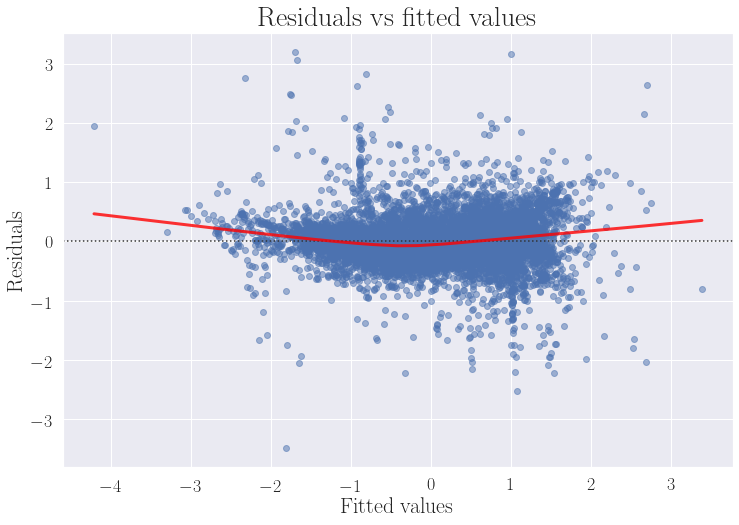

In [66]:
plt_lm_1 = plt.figure(figsize=(12, 8))
plt_lm_1.axes[0] = sns.residplot(model_fitted_y, df.columns[-1], 
                                  data=df,lowess=True, scatter_kws={'alpha':0.5},
                                 line_kws={'color':'red','lw':3, 'alpha':0.8})
plt_lm_1.axes[0].set_title(r'$\mathrm{Residuals \; vs \; fitted \; values}$', fontsize = 28)
plt_lm_1.axes[0].set_xlabel(r'$\mathrm{Fitted \; values}$', fontsize=22)
plt_lm_1.axes[0].set_ylabel(r'$\mathrm{Residuals}$', fontsize=22);

plt_lm_1.savefig("residual_plot.pdf")

## Scale location plot

In [68]:
plt.rcParams['text.usetex'] = False


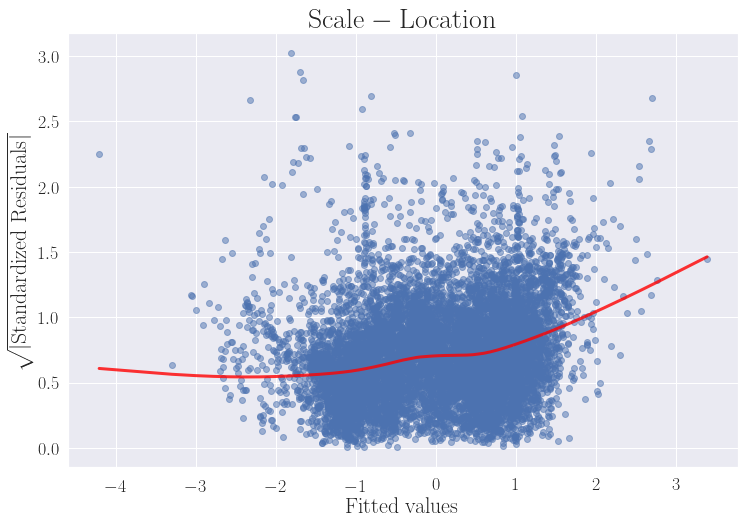

In [68]:
plt_lm_2 = plt.figure(figsize=(12, 8))
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
           scatter=False,
           ci=False,
           lowess=True, 
           line_kws={'color':'red', 'lw':3, 'alpha':0.8})
plt_lm_2.axes[0].set_title(r'$\mathrm{Scale-Location}$', fontsize=28)
plt_lm_2.axes[0].set_xlabel(r'$\mathrm{Fitted \; values}$', fontsize=22)
plt_lm_2.axes[0].set_ylabel(r'$\sqrt{| \mathrm{Standardized \; Residuals} |}$', fontsize=22)
plt_lm_2.savefig("scale_location_plot.pdf")

## QQ-plot

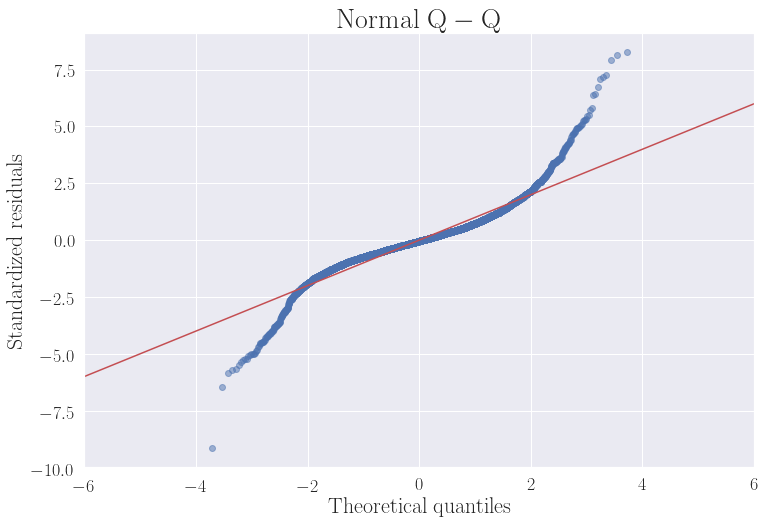

In [70]:
QQ = ProbPlot(model_norm_residuals)
plt_lm_3 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=3)
plt_lm_3.set_figwidth(12)
plt_lm_3.set_figheight(8)
plt_lm_3.axes[0].set_title(r'$\mathrm{Normal \; Q-Q}$', fontsize=28)
plt_lm_3.axes[0].set_xlabel(r'$\mathrm{Theoretical \; quantiles}$', fontsize=22)
plt_lm_3.axes[0].set_ylabel(r'$\mathrm{Standardized \; residuals}$', fontsize=22)
plt_lm_3.axes[0].set_xlim([-6, 6])
plt_lm_3.savefig("qq_plot.pdf")

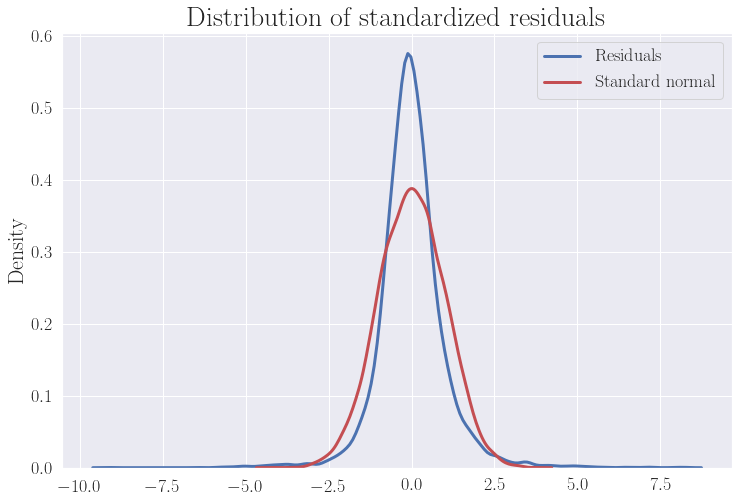

In [71]:
standard_normal = np.random.normal(size=10000)

plt.figure(figsize=(12, 8))
plt.title(r'$\mathrm{Distribution \; of \; standardized \; residuals}$', fontsize=28)
sns.distplot(model_norm_residuals,hist=False, label=r"$\mathrm{Residuals}$", kde_kws=dict(linewidth=3));
sns.distplot(standard_normal,hist=False,color="r", label=r"$\mathrm{Standard \; normal}$",kde_kws=dict(linewidth=3))
plt.ylabel(r"$\mathrm{Density}$", fontsize=22)
plt.legend(fontsize=18)
plt.savefig("distribution_residuals.pdf")

In [65]:
path_to_training_set = "../thesis/data/train_regression.csv"
path_to_validation_set = "../thesis/data/val_regression.csv"
path_to_test_set = "../thesis/data/test_regression.csv"

In [66]:
training_set = pd.read_csv(path_to_training_set, sep=";")
training_wells = list(set(training_set["well_name"]))
print("Size of training set; wells: {}, samples {}".format(len(training_wells), training_set.shape[0]))

Size of training set; wells: 24, samples 185153


In [67]:
validation_set = pd.read_csv(path_to_validation_set, sep=";")
validation_wells = list(set(validation_set["well_name"]))
print("Size of validation set; wells: {}, samples: {}".format(len(validation_wells), validation_set.shape[0]))

Size of validation set; wells: 2, samples: 17560


In [68]:
test_set = pd.read_csv(path_to_test_set, sep=";")
test_wells = list(set(test_set["well_name"]))
print("Size of validation set; wells: {}, samples: {}".format(len(test_wells), test_set.shape[0]))

Size of validation set; wells: 8, samples: 53301


## Training, validation and test wells

In [15]:
training_wells

['25/8-14 ST2',
 '30/11-6 S',
 '30/11-8 S',
 '25/4-7',
 '25/5-9',
 '30/5-2',
 '30/11-9 A',
 '25/11-24',
 '25/10-15 S',
 '25/2-18 A',
 '25/8-8 S',
 '25/10-16 S',
 '25/10-16 A',
 '25/4-9 S',
 '25/8-12 S',
 '25/2-18 ST2',
 '25/7-4 S',
 '25/6-4 S',
 '25/10-16 C',
 '25/4-13 A',
 '30/9-22',
 '25/10-12 ST2',
 '25/8-12 A',
 '25/5-6']

In [16]:
validation_wells


['25/5-5', '30/11-7 A']

In [17]:
test_wells

['25/7-6',
 '30/11-11 S',
 '30/11-9 ST2',
 '30/6-26',
 '30/8-5 T2',
 '25/4-10 S',
 '30/11-7',
 '30/11-10']

## homo- vs heteroscedastic aleatoric variance

In [134]:
x = np.linspace(0, 100, num=100)
y_homo = x + np.random.normal(loc=0, scale=1)
y_hetero = x + np.random.normal(loc=0, scale=0.1*x)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text yticklabel objects>)

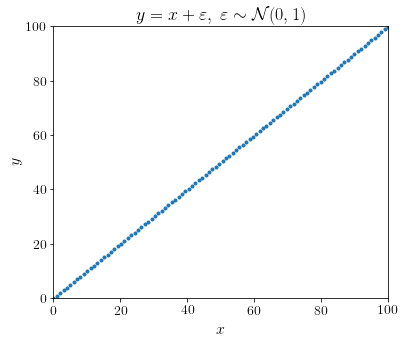

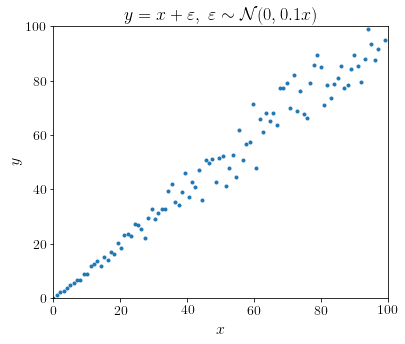

In [137]:
plt.figure(figsize=(6,5))
plt.plot(x, y_homo, '.')
plt.ylim([0, 100])
plt.xlim([0, 100])
plt.title(r'$y = x + \varepsilon, \; \varepsilon \sim \mathcal{N}(0,1)$', fontsize=18)
plt.xlabel(r"$x$", fontsize=16)
plt.ylabel(r"$y$", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig("homoscedastic_example.pdf")

plt.figure(figsize=(6,5))
plt.plot(x, y_hetero, '.')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.title(r'$y = x + \varepsilon, \; \varepsilon \sim \mathcal{N}(0,0.1x)$', fontsize=18)
plt.xlabel(r"$x$", fontsize=16)
plt.ylabel(r"$y$", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig("heteroscedastic_example.pdf")

In [73]:
os.getcwd()

'/Users/christianlehre/Desktop/V21/Masteroppgave/code/notebooks'

## Distribution of target in training and test set

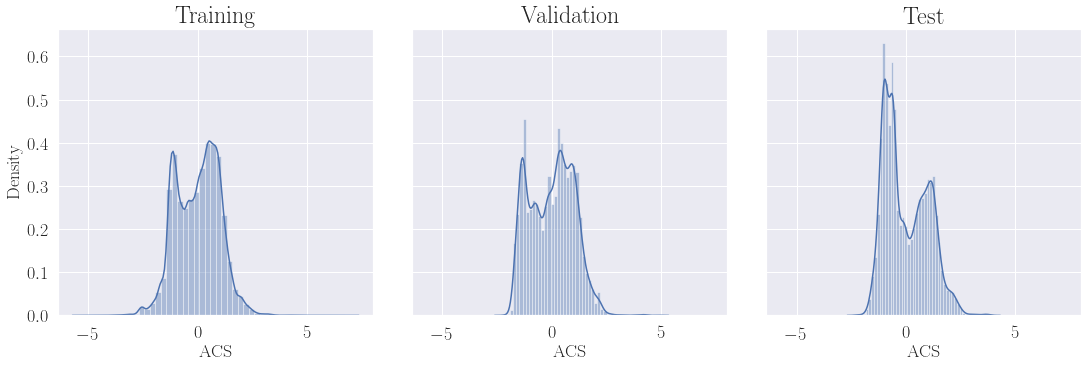

In [74]:
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(16, 6))


sns.distplot(training_set["ACS"], ax = axs[0])
sns.distplot(validation_set["ACS"], ax=axs[1])
sns.distplot(test_set["ACS"], ax=axs[2])

axs[0].set_title(r"$\mathrm{Training}$", fontsize=24)
axs[1].set_title(r"$\mathrm{Validation}$", fontsize=24)
axs[2].set_title(r"$\mathrm{Test}$", fontsize=24)

axs[0].set_ylabel(r"$\mathrm{Density}$", fontsize=18)


axs[0].set_xlabel(r"$\mathrm{ACS}$", fontsize=18)
axs[1].set_xlabel(r"$\mathrm{ACS}$", fontsize=18)
axs[2].set_xlabel(r"$\mathrm{ACS}$", fontsize=18)
plt.tight_layout()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


plt.savefig("distribution_acs_across_datasets.pdf")

Text(0.5, 1.0, 'Training set')

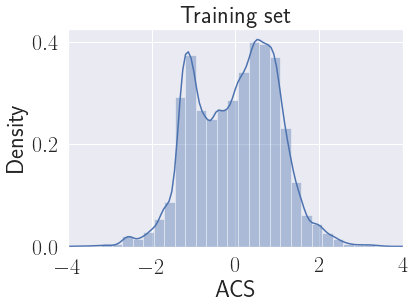

In [19]:
sns.distplot(training_set["ACS"])
plt.xlim([-4, 4])
plt.title("Training set")

Text(0.5, 1.0, 'Validation set')

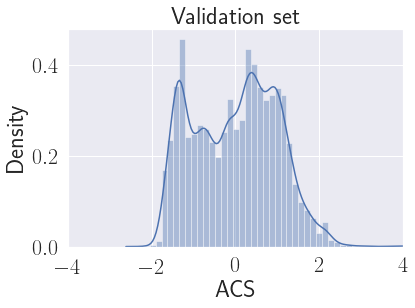

In [20]:
sns.distplot(validation_set["ACS"])
plt.xlim([-4, 4])
plt.title("Validation set")

Text(0.5, 1.0, 'Test set')

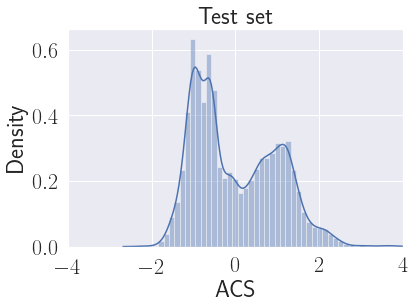

In [21]:
sns.distplot(test_set["ACS"])
plt.xlim([-4, 4])
plt.title("Test set")

## Well-wise distribution of target across datasets

### Training set

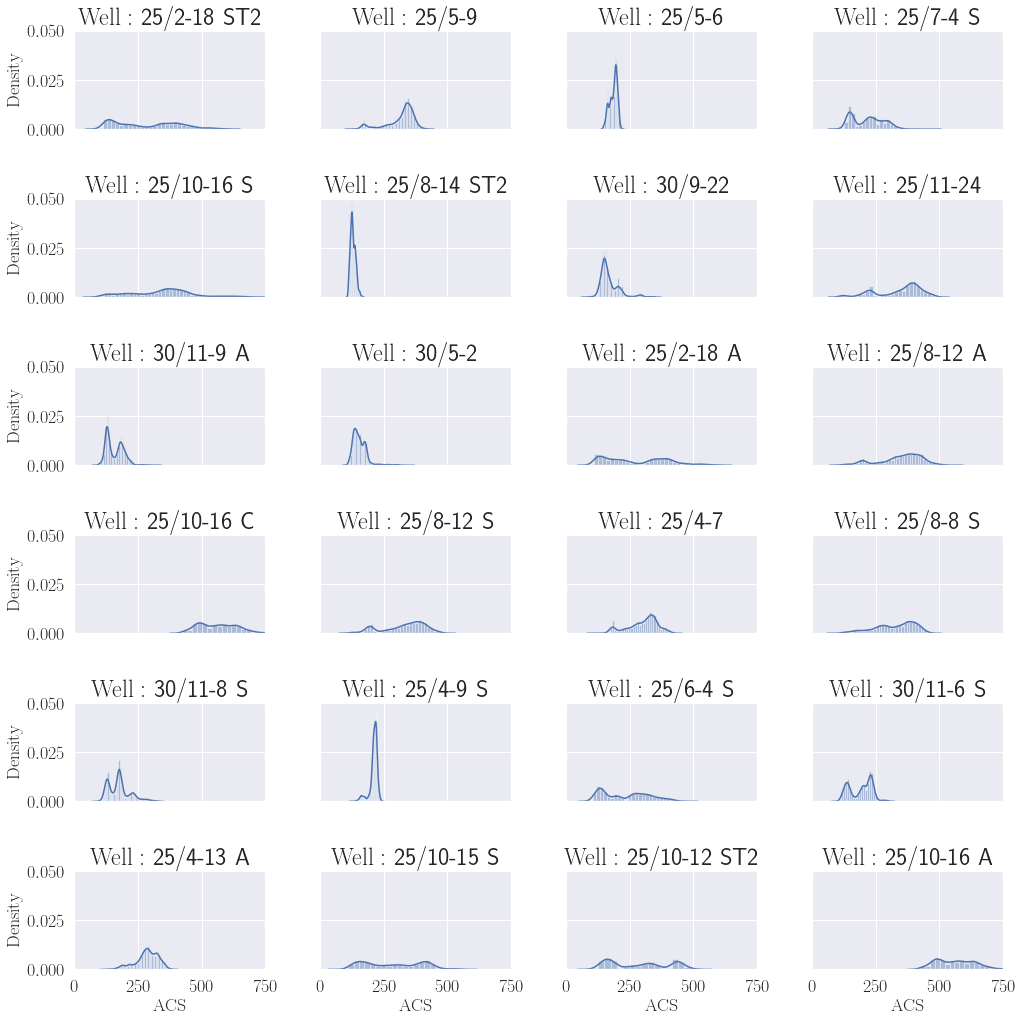

In [81]:
fig, axs = plt.subplots(len(training_wells)//4, 4, figsize=(15, 15), sharex=True, sharey=True)
axs = axs.reshape(-1)
y_axis = [0, 4, 8, 12, 16, 20]
x_axis = [20, 21, 22, 23]
for i, well in enumerate(training_wells):
    data_well = raw_data[raw_data["well_name"] == well]
    axs[i].set_title(r"$\mathrm {{{{Well:}}}}$ {}".format(well), fontsize=24)
    sns.distplot(data_well[target_variable], ax=axs[i])
    if i in y_axis:
        axs[i].set_ylabel(r"$\mathrm{Density}$", fontsize=18)
    else:
        axs[i].set_ylabel("")
    if i in x_axis:
        axs[i].set_xlabel(r"$\mathrm{ACS}$", fontsize=18)
    axs[i].set_ylim([0, 0.05])
    axs[i].set_xlim([0, 750])
    axs[i].set_xticks([0, 250, 500, 750])
    axs[i].set_yticks([0, 0.025, 0.050])
plt.tight_layout(pad=1)
plt.savefig("wellwise_distirbution_training_set.pdf")

### validation set

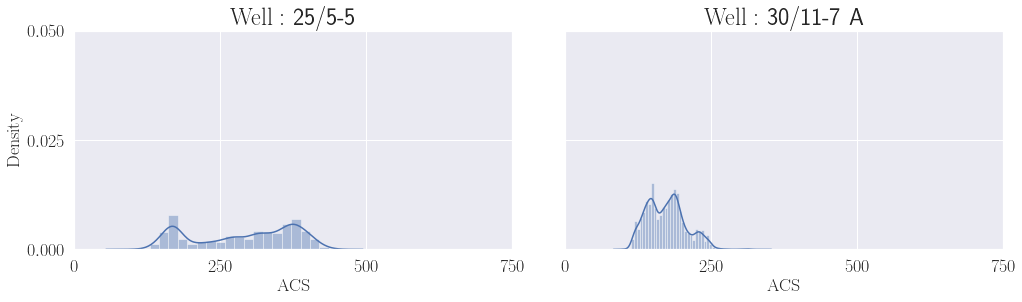

In [82]:
fig, axs = plt.subplots(len(validation_wells)//2,2, figsize=(15, 5), sharex=True, sharey=True)
axs = axs.reshape(-1)
x_axis = [0, 1]
y_axis = [0]
for i, well in enumerate(validation_wells):
    data_well = raw_data[raw_data["well_name"] == well]
    axs[i].set_title(r"$\mathrm {{{{Well:}}}}$ {}".format(well), fontsize=24)
    sns.distplot(data_well[target_variable], ax=axs[i])
    if i in y_axis:
        axs[i].set_ylabel(r"$\mathrm{Density}$", fontsize=18)
    else:
        axs[i].set_ylabel("")
    if i in x_axis:
        axs[i].set_xlabel(r"$\mathrm{ACS}$", fontsize=18)
    axs[i].set_ylim([0, 0.05])
    axs[i].set_xlim([0, 750])
    axs[i].set_xticks([0, 250, 500, 750])
    axs[i].set_yticks([0, 0.025, 0.050])
plt.tight_layout(pad=1)
plt.savefig("wellwise_distirbution_validation_set.pdf")

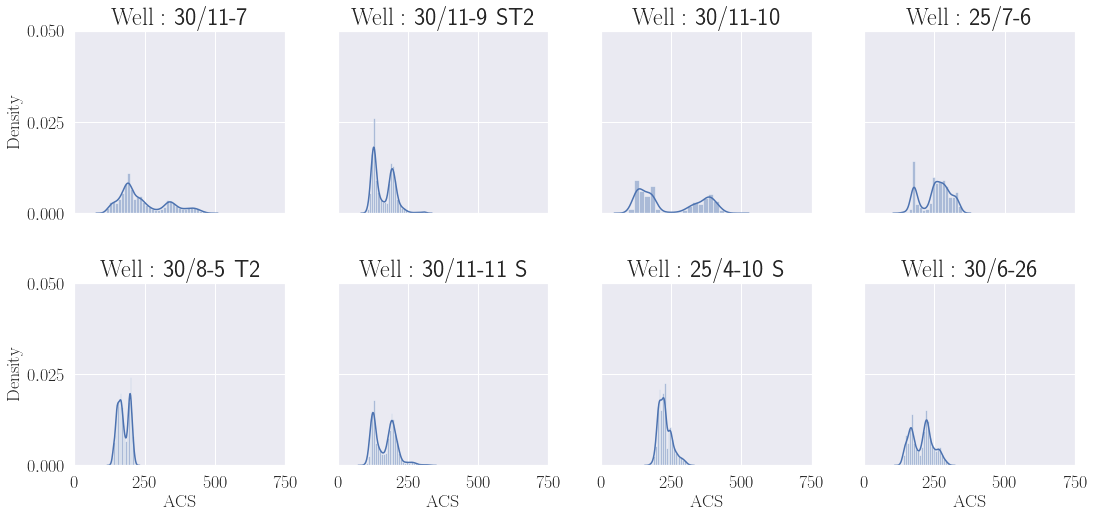

In [85]:
fig, axs = plt.subplots(len(test_wells)//4, 4, figsize=(16, 8), sharex=True, sharey=True)
axs = axs.reshape(-1)
y_axis = [0, 4]
x_axis = [4, 5, 6, 7]
for i, well in enumerate(test_wells):
    data_well = raw_data[raw_data["well_name"] == well]
    axs[i].set_title(r"$\mathrm {{{{Well:}}}}$ {}".format(well), fontsize=24)
    sns.distplot(data_well[target_variable], ax=axs[i])
    if i in y_axis:
        axs[i].set_ylabel(r"$\mathrm{Density}$", fontsize=18)
    else:
        axs[i].set_ylabel("")
    if i in x_axis:
        axs[i].set_xlabel(r"$\mathrm{ACS}$", fontsize=18)
    axs[i].set_ylim([0, 0.05])
    axs[i].set_xlim([0, 750])
    axs[i].set_xticks([0, 250, 500, 750])
    axs[i].set_yticks([0, 0.025, 0.050])
plt.tight_layout(pad=1)
plt.savefig("wellwise_distirbution_test_set.pdf")